# Tratamento do Iris dataset

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np
import sklearn.metrics
df = pd.read_csv("data/iris.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
SepalLength    150 non-null float64
SepalWidth     150 non-null float64
PetalLength    150 non-null float64
PetalWidth     150 non-null float64
Name           150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


# Exemplos por classe

In [2]:
df["Name"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Name, dtype: int64

# Avaliação de features

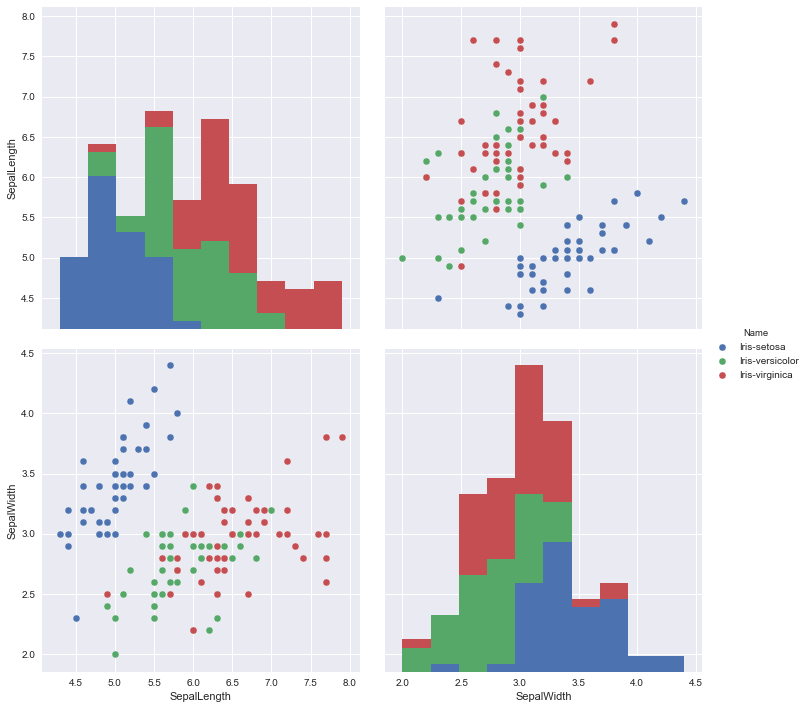

In [3]:
%matplotlib inline
sns.pairplot(vars=["SepalLength","SepalWidth"], data=df, hue="Name", size=5)
sns.plt.show()

# Binarização das categorias

In [4]:
pd.get_dummies(df["Name"]).head(5)

,Iris-setosa,Iris-versicolor,Iris-virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [5]:
df = pd.concat([df,pd.get_dummies(df["Name"])],axis=1)

In [6]:
df.head(5)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,Iris-setosa,Iris-versicolor,Iris-virginica
0,5.1,3.5,1.4,0.2,Iris-setosa,1,0,0
1,4.9,3.0,1.4,0.2,Iris-setosa,1,0,0
2,4.7,3.2,1.3,0.2,Iris-setosa,1,0,0
3,4.6,3.1,1.5,0.2,Iris-setosa,1,0,0
4,5.0,3.6,1.4,0.2,Iris-setosa,1,0,0


# Aleatorizando dataset

In [7]:
np.random.seed(2)
df = df.reindex(np.random.permutation(df.index))
df.head(5)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,Iris-setosa,Iris-versicolor,Iris-virginica
6,4.6,3.4,1.4,0.3,Iris-setosa,1,0,0
3,4.6,3.1,1.5,0.2,Iris-setosa,1,0,0
113,5.7,2.5,5.0,2.0,Iris-virginica,0,0,1
12,4.8,3.0,1.4,0.1,Iris-setosa,1,0,0
24,4.8,3.4,1.9,0.2,Iris-setosa,1,0,0


# Separação x e y

In [8]:
def get_x_y(df):
    x = df.copy()[["SepalLength","SepalWidth","PetalLength","PetalWidth"]].values
    y = df.copy()[["Iris-setosa", "Iris-versicolor", "Iris-virginica"]].values
    return x,y

x,y = get_x_y(df)

print(x[0],y[0])

[ 4.6  3.4  1.4  0.3] [1 0 0]


# Separação treino e teste

In [9]:
import math
tamanho_treino = math.floor(x.shape[0]*0.8)
x_train, y_train = x[:tamanho_treino], y[:tamanho_treino]
x_test, y_test = x[tamanho_treino:], y[tamanho_treino:]

print(x_train.shape)
print(x_test.shape)

(120, 4)
(30, 4)


# Criação de arvore de decisão

In [10]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=1,max_depth=2)
clf.fit(x_train,y_train)
print("Score treino",clf.score(x_train,y_train)) 
print("Score teste", clf.score(x_test,y_test))

Score treino 0.958333333333
Score teste 0.966666666667


# Visualizar arvore de decisão

(0, 'SepalLength')
(1, 'SepalWidth')
(2, 'PetalLength')
(3, 'PetalWidth')


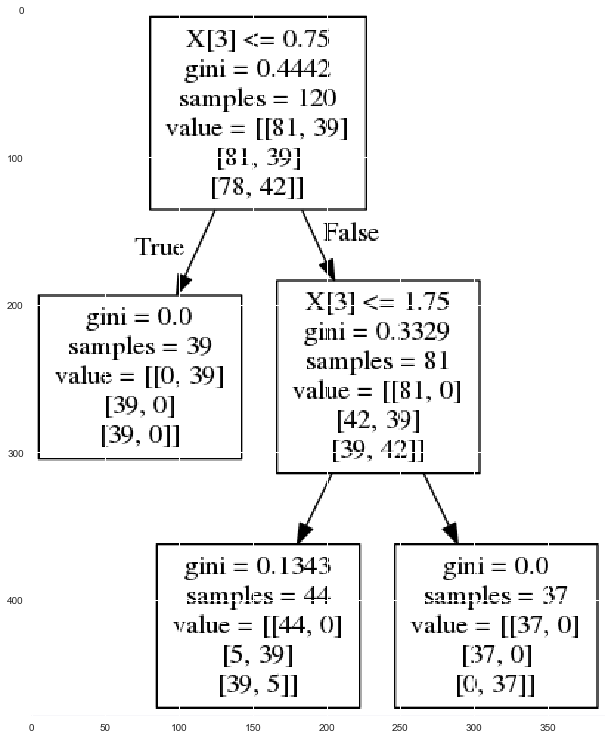

In [11]:
import io
from scipy import misc
from sklearn import tree
import pydot
sns.set()

fig = plt.figure(figsize=(15, 13))

def show_tree(decisionTree, file_path):
    dotfile = io.StringIO()
    tree.export_graphviz(decisionTree, out_file=dotfile)
    pydot.graph_from_dot_data(dotfile.getvalue())[0].write_png(file_path)
    i = misc.imread(file_path)
    plt.imshow(i)

# To use it
lista = ["SepalLength","SepalWidth","PetalLength","PetalWidth"]
for a in enumerate(lista):
    print (a)
show_tree(clf, 'pics/irisTree.png')

# Visualização do resultado

## Geração de relatório

In [12]:
y_predicted = clf.predict(x_test)
print(sklearn.metrics.classification_report(y_test,y_predicted))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        11
          1       1.00      0.91      0.95        11
          2       0.89      1.00      0.94         8

avg / total       0.97      0.97      0.97        30



## Gerar matriz de confusão

In [13]:
confusion_matrix = sklearn.metrics.confusion_matrix(np.argmax(y_test,axis=1),np.argmax(y_predicted,axis=1))
confusion_matrix

array([[11,  0,  0],
       [ 0, 10,  1],
       [ 0,  0,  8]])

## Visualizar matriz de confusão

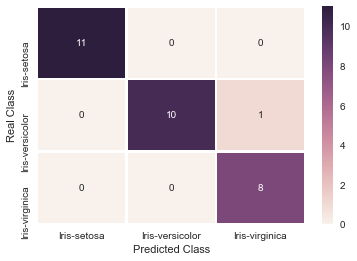

In [14]:
%matplotlib inline
df_confusion_matrix = pd.DataFrame(confusion_matrix,columns=["Iris-setosa", "Iris-versicolor", "Iris-virginica"],index=["Iris-setosa", "Iris-versicolor", "Iris-virginica"])
ax = sns.heatmap(df_confusion_matrix, annot=True, linewidths=1.5, fmt='g');
ax.set_xlabel("Predicted Class")
ax.set_ylabel("Real Class")

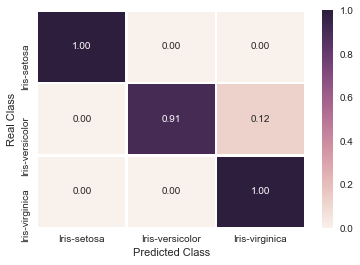

In [15]:
%matplotlib inline
df_confusion_matrix = pd.DataFrame(confusion_matrix,columns=["Iris-setosa", "Iris-versicolor", "Iris-virginica"],index=["Iris-setosa", "Iris-versicolor", "Iris-virginica"])
ax = sns.heatmap(df_confusion_matrix/df_confusion_matrix.T.sum(), annot=True, linewidths=1.5, fmt='.2f');
ax.set_xlabel("Predicted Class")
ax.set_ylabel("Real Class")

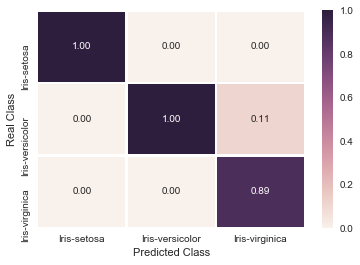

In [16]:
%matplotlib inline
df_confusion_matrix = pd.DataFrame(confusion_matrix,columns=["Iris-setosa", "Iris-versicolor", "Iris-virginica"],index=["Iris-setosa", "Iris-versicolor", "Iris-virginica"])
ax = sns.heatmap(df_confusion_matrix/df_confusion_matrix.sum(), annot=True, linewidths=1.5, fmt='.2f');
ax.set_xlabel("Predicted Class")
ax.set_ylabel("Real Class")